In [2]:
# Import required libraries
import sys
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import sqlite3

# Add the src directory to Python path
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
src_path = project_root / "src"
sys.path.insert(0, str(src_path))

# Import our custom modules
from database.connection import DatabaseConnection
from database.models import get_table_stats

print("✅ Libraries imported successfully!")
print(f"📁 Project root: {project_root}")
print(f"🗄️ Database path: {project_root}/data/health_data.db")


✅ Libraries imported successfully!
📁 Project root: /Users/mgartner/Documents/personal_projects/healthdatabase
🗄️ Database path: /Users/mgartner/Documents/personal_projects/healthdatabase/data/health_data.db


In [3]:
# Initialize database connection
db_connection = DatabaseConnection()

# Check database status
print("🔍 Database Status Check:")
print(f"Database exists: {db_connection.database_exists()}")

# Get basic statistics
stats = get_table_stats(db_connection)
print(f"\n📊 Database Statistics:")
print(f"  Total records: {stats.get('total_records', 0)}")

date_range = stats.get('date_range', {})
if date_range:
    print(f"  Date range: {date_range['min_date']} to {date_range['max_date']}")

sources = stats.get('sources', {})
if sources:
    print(f"  Data sources:")
    for source, count in sources.items():
        print(f"    - {source}: {count} records")


🔍 Database Status Check:
Database exists: True

📊 Database Statistics:
  Total records: 500
  Date range: 2023-01-04 to 2024-09-28
  Data sources:
    - zepp: 500 records


In [4]:
# Load all data into a pandas DataFrame
query = """
SELECT
    date,
    steps,
    calories,
    distance,
    run_distance,
    created_at,
    updated_at
FROM daily_activity
ORDER BY date
"""

# Execute query and convert to DataFrame
results = db_connection.execute_query(query)
df = pd.DataFrame([dict(row) for row in results])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"📊 Loaded {len(df)} records")
print(f"\n🗓️ Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"\n📋 DataFrame shape: {df.shape}")
print(f"\n📑 Column info:")
print(df.info())


📊 Loaded 500 records

🗓️ Date range: 2023-01-04 to 2024-09-28

📋 DataFrame shape: (500, 7)

📑 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          500 non-null    datetime64[ns]
 1   steps         500 non-null    int64         
 2   calories      500 non-null    int64         
 3   distance      500 non-null    float64       
 4   run_distance  500 non-null    float64       
 5   created_at    500 non-null    object        
 6   updated_at    500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 27.5+ KB
None


In [5]:
df.head()

,date,steps,calories,distance,run_distance,created_at,updated_at
0,2023-01-04,5351,202,4160.0,0.0,2025-06-04 15:18:59,2025-06-04 15:18:59
1,2023-01-05,8855,326,6929.0,0.0,2025-06-04 15:18:59,2025-06-04 15:18:59
2,2023-01-06,19256,770,16358.0,0.0,2025-06-04 15:18:59,2025-06-04 15:18:59
3,2023-01-07,13662,520,10902.0,0.0,2025-06-04 15:18:59,2025-06-04 15:18:59
4,2023-01-08,14656,557,12268.0,0.0,2025-06-04 15:18:59,2025-06-04 15:18:59


In [1]:
# Display first few rows
print("📋 First 5 records:")
print(df.head())

print("\n📋 Last 5 records:")
print(df.tail())

print("\n📊 Basic statistics:")
print(df.describe())


📋 First 5 records:


NameError: name 'df' is not defined

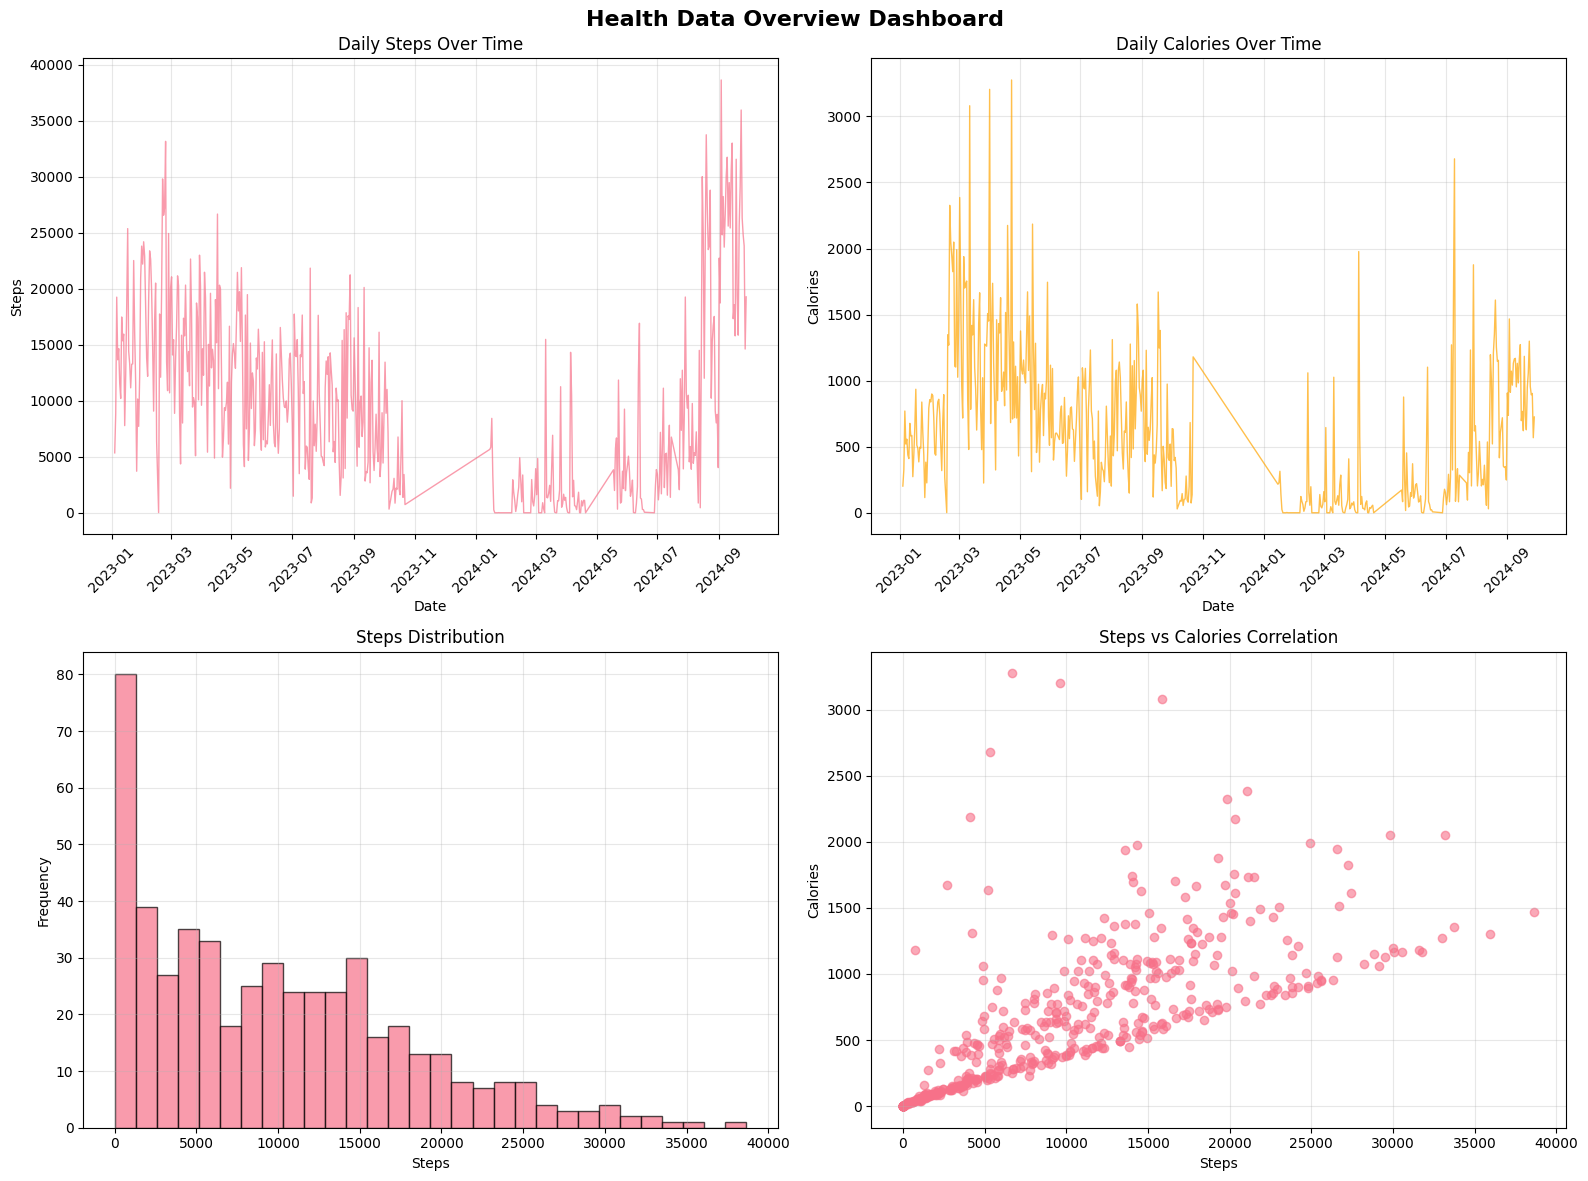

In [5]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Health Data Overview Dashboard', fontsize=16, fontweight='bold')

# 1. Steps over time
axes[0, 0].plot(df['date'], df['steps'], alpha=0.7, linewidth=1)
axes[0, 0].set_title('Daily Steps Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Steps')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Calories over time
axes[0, 1].plot(df['date'], df['calories'], alpha=0.7, linewidth=1, color='orange')
axes[0, 1].set_title('Daily Calories Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Calories')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Steps distribution
axes[1, 0].hist(df['steps'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Steps Distribution')
axes[1, 0].set_xlabel('Steps')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Steps vs Calories scatter plot
axes[1, 1].scatter(df['steps'], df['calories'], alpha=0.6)
axes[1, 1].set_title('Steps vs Calories Correlation')
axes[1, 1].set_xlabel('Steps')
axes[1, 1].set_ylabel('Calories')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:
# Calculate correlation between steps and calories
correlation = df['steps'].corr(df['calories'])
print(f"📊 Correlation between Steps and Calories: {correlation:.3f}")

# Add day of week analysis
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.to_period('M')

# Average steps by day of week
print(f"\n📅 Average Steps by Day of Week:")
day_avg = df.groupby('day_of_week')['steps'].mean().sort_values(ascending=False)
for day, avg_steps in day_avg.items():
    print(f"  {day}: {avg_steps:.0f} steps")

print(f"\n📅 Average Calories by Day of Week:")
cal_avg = df.groupby('day_of_week')['calories'].mean().sort_values(ascending=False)
for day, avg_cals in cal_avg.items():
    print(f"  {day}: {avg_cals:.0f} calories")


📊 Correlation between Steps and Calories: 0.720

📅 Average Steps by Day of Week:
  Monday: 11060 steps
  Tuesday: 10756 steps
  Thursday: 10664 steps
  Wednesday: 10509 steps
  Friday: 8927 steps
  Saturday: 8578 steps
  Sunday: 8420 steps

📅 Average Calories by Day of Week:
  Wednesday: 702 calories
  Monday: 687 calories
  Tuesday: 682 calories
  Thursday: 631 calories
  Sunday: 614 calories
  Friday: 549 calories
  Saturday: 515 calories


In [7]:
# Monthly trends
print(f"\n📈 Monthly Trends:")
monthly_stats = df.groupby('month').agg({
    'steps': ['mean', 'max', 'min'],
    'calories': ['mean', 'max', 'min']
}).round(0)

print(monthly_stats)

# Find the most and least active days
print(f"\n🏆 Most Active Days (by steps):")
top_days = df.nlargest(5, 'steps')[['date', 'steps', 'calories']]
for _, row in top_days.iterrows():
    print(f"  {row['date'].date()}: {row['steps']} steps, {row['calories']} calories")

print(f"\n😴 Least Active Days (by steps):")
bottom_days = df.nsmallest(5, 'steps')[['date', 'steps', 'calories']]
for _, row in bottom_days.iterrows():
    print(f"  {row['date'].date()}: {row['steps']} steps, {row['calories']} calories")



📈 Monthly Trends:
           steps               calories           
            mean    max    min     mean   max  min
month                                             
2023-01  13939.0  25377   3709    517.0   935  115
2023-02  18256.0  33169     19   1041.0  2327    1
2023-03  14836.0  23003   4360   1286.0  3081  225
2023-04  12973.0  26674   2188   1236.0  3276  324
2023-05  12751.0  21888   4121   1005.0  2185  311
2023-06  10120.0  16547   5314    662.0  1117  277
2023-07   9167.0  21847    882    538.0  1232   53
2023-08  10046.0  21245   1554    786.0  1580  149
2023-09   8277.0  20119   2678    640.0  1671  119
2023-10   4664.0  13451    326    288.0  1180   29
2024-01   1572.0   8429      0     61.0   314    0
2024-02   1153.0   4911      0     90.0  1059    0
2024-03   2195.0  15484      0    125.0  1026    0
2024-04   1896.0  14327      0    160.0  1977    0
2024-05   4088.0  11850    322    216.0   876   17
2024-06   2789.0  16925      0    144.0  1102    0
2024-07   63

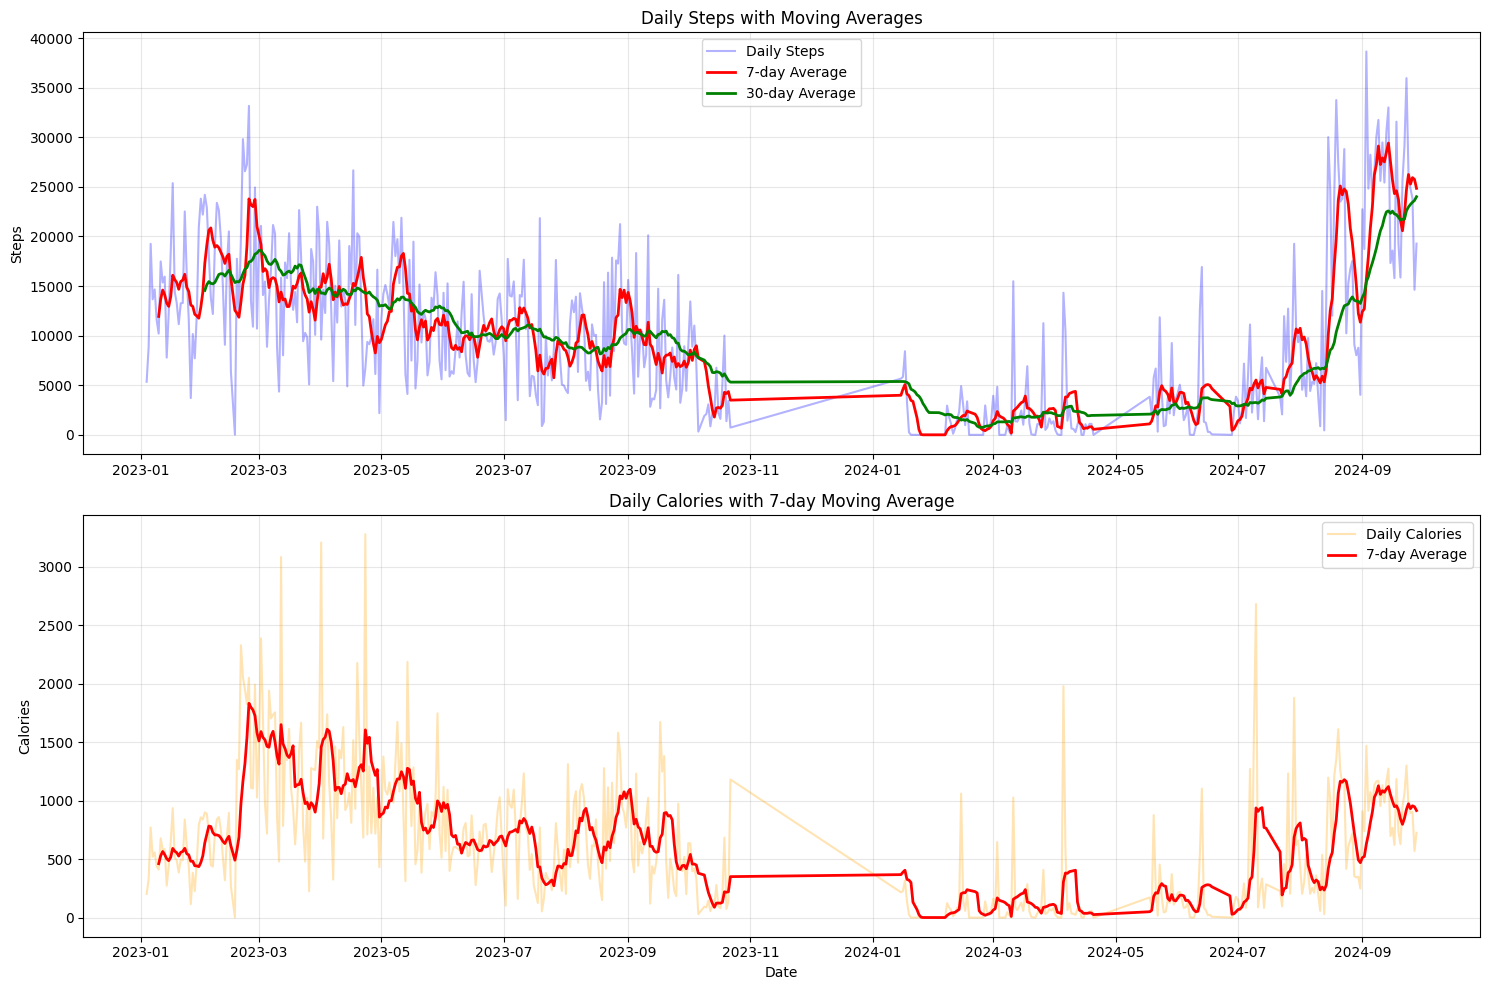

In [8]:
# Moving averages for trend analysis
df['steps_7day_avg'] = df['steps'].rolling(window=7).mean()
df['steps_30day_avg'] = df['steps'].rolling(window=30).mean()
df['calories_7day_avg'] = df['calories'].rolling(window=7).mean()

# Plot moving averages
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Steps with moving averages
ax1.plot(df['date'], df['steps'], alpha=0.3, label='Daily Steps', color='blue')
ax1.plot(df['date'], df['steps_7day_avg'], label='7-day Average', color='red', linewidth=2)
ax1.plot(df['date'], df['steps_30day_avg'], label='30-day Average', color='green', linewidth=2)
ax1.set_title('Daily Steps with Moving Averages')
ax1.set_ylabel('Steps')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Calories with moving average
ax2.plot(df['date'], df['calories'], alpha=0.3, label='Daily Calories', color='orange')
ax2.plot(df['date'], df['calories_7day_avg'], label='7-day Average', color='red', linewidth=2)
ax2.set_title('Daily Calories with 7-day Moving Average')
ax2.set_xlabel('Date')
ax2.set_ylabel('Calories')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


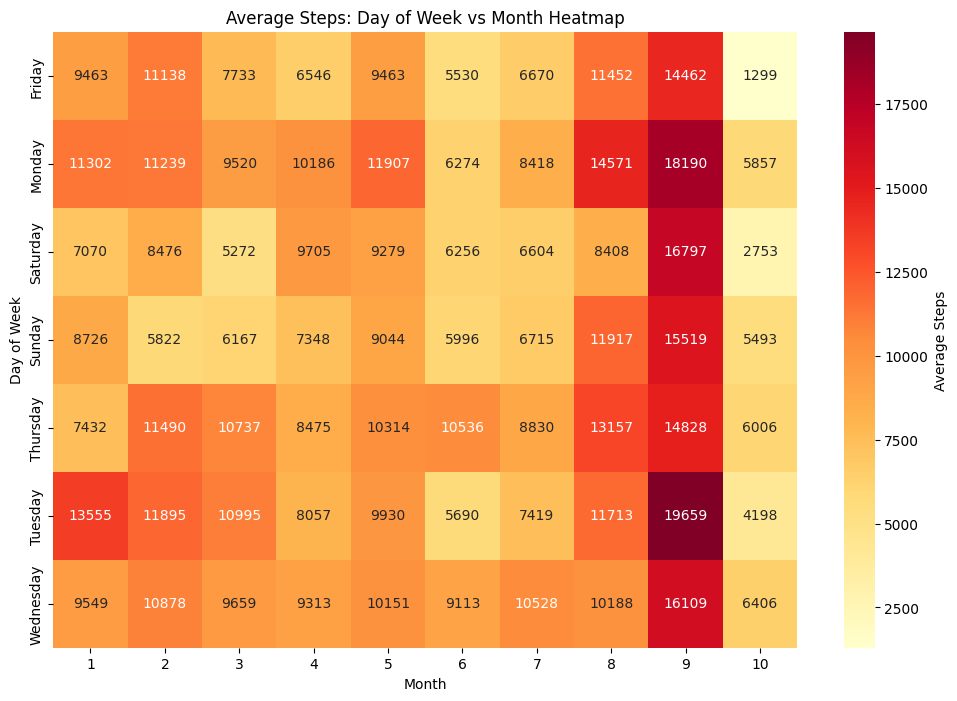

📊 Weekly Activity Patterns:
               steps         calories       
                mean     std     mean    std
day_of_week                                 
Friday        8927.0  7933.0    549.0  475.0
Monday       11060.0  8629.0    687.0  562.0
Saturday      8578.0  7071.0    515.0  510.0
Sunday        8420.0  7260.0    614.0  644.0
Thursday     10664.0  8397.0    631.0  533.0
Tuesday      10756.0  8824.0    682.0  563.0
Wednesday    10509.0  8140.0    702.0  572.0


In [9]:
# Heatmap for day of week vs month patterns
pivot_steps = df.pivot_table(values='steps',
                            index='day_of_week',
                            columns=df['date'].dt.month,
                            aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_steps, annot=True, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Average Steps'})
plt.title('Average Steps: Day of Week vs Month Heatmap')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

# Weekly activity patterns
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = df.groupby('day_of_week').agg({
    'steps': ['mean', 'std'],
    'calories': ['mean', 'std']
}).round(0)

print("📊 Weekly Activity Patterns:")
print(day_stats)


In [10]:
def analyze_period(start_date, end_date):
    """Analyze data for a specific time period."""
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    period_data = df.loc[mask]

    print(f"📅 Analysis for {start_date} to {end_date}")
    print(f"📊 Total days: {len(period_data)}")
    print(f"👟 Average daily steps: {period_data['steps'].mean():.0f}")
    print(f"🔥 Average daily calories: {period_data['calories'].mean():.0f}")
    print(f"🏆 Max steps: {period_data['steps'].max()} on {period_data.loc[period_data['steps'].idxmax(), 'date'].date()}")
    print(f"😴 Min steps: {period_data['steps'].min()} on {period_data.loc[period_data['steps'].idxmin(), 'date'].date()}")

    return period_data

def find_streaks(threshold=10000):
    """Find consecutive days above a step threshold."""
    df['above_threshold'] = df['steps'] >= threshold
    df['streak_group'] = (df['above_threshold'] != df['above_threshold'].shift()).cumsum()

    streaks = df[df['above_threshold']].groupby('streak_group').size()
    longest_streak = streaks.max() if len(streaks) > 0 else 0

    print(f"🎯 Step goal: {threshold:,} steps")
    print(f"🔥 Longest streak: {longest_streak} days")
    print(f"📊 Total days above goal: {df['above_threshold'].sum()}")
    print(f"📈 Success rate: {(df['above_threshold'].sum() / len(df) * 100):.1f}%")

    return longest_streak

# Example usage
print("🔍 Recent 30-day analysis:")
recent_data = analyze_period('2024-08-01', '2024-08-31')

print(f"\n🎯 Step goal analysis:")
find_streaks(10000)


🔍 Recent 30-day analysis:
📅 Analysis for 2024-08-01 to 2024-08-31
📊 Total days: 31
👟 Average daily steps: 13158
🔥 Average daily calories: 593
🏆 Max steps: 33756 on 2024-08-19
😴 Min steps: 447 on 2024-08-13

🎯 Step goal analysis:
🎯 Step goal: 10,000 steps
🔥 Longest streak: 28 days
📊 Total days above goal: 222
📈 Success rate: 44.4%


np.int64(28)